<a href="https://colab.research.google.com/github/hasybiabi/Stock-Market-Analysis/blob/master/cnn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [6]:
dataset = pd.read_csv('EURUSD_Daily.csv',index_col="Date",parse_dates=True)

In [ ]:
dataset.head()

,High,Low,Open,Close,Volume
Date,,,,,
2020-01-01,1.12120,1.12218,1.12106,1.12188,2631
2020-01-02,1.12188,1.12245,1.11635,1.11708,487247
2020-01-03,1.11707,1.11798,1.11249,1.11548,177422
2020-01-05,1.11656,1.11677,1.11589,1.11604,4401
2020-01-06,1.11603,1.12055,1.11571,1.11954,139986


In [ ]:
dataset.isna().any()

High      False
Low       False
Open      False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 314 entries, 2020-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    314 non-null    float64
 1   Low     314 non-null    float64
 2   Open    314 non-null    float64
 3   Close   314 non-null    float64
 4   Volume  314 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 14.7 KB


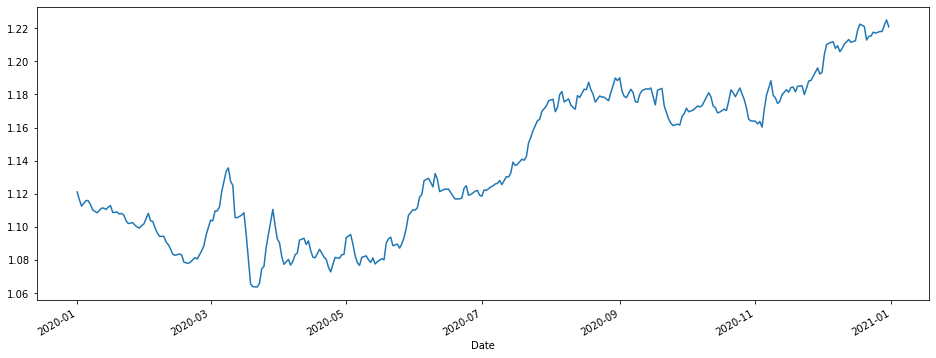

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].astype(str).str.replace(',', '').astype(float)

In [ ]:
dataset["Volume"] = dataset["Volume"].astype(str).str.replace(',', '').astype(float)

In [ ]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,High,Low,Open,Close,Volume
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN
2020-01-08,1.118237,1.119493,1.115001,1.116673,166080.000000
2020-01-09,1.116823,1.118044,1.113313,1.115109,186110.857143
2020-01-10,1.115257,1.116681,1.112191,1.114333,134615.142857


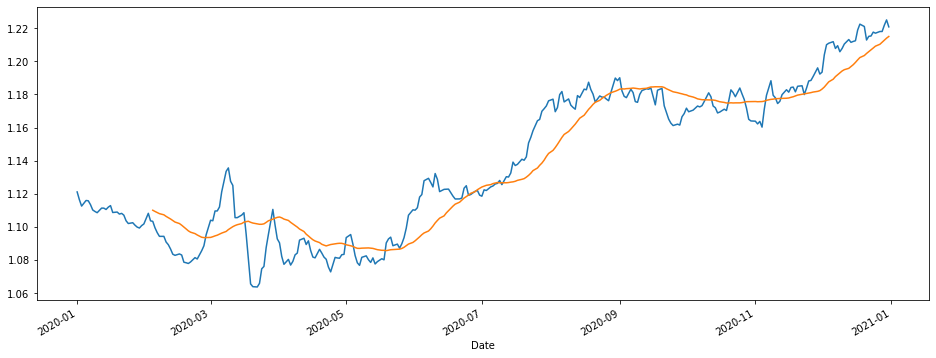

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

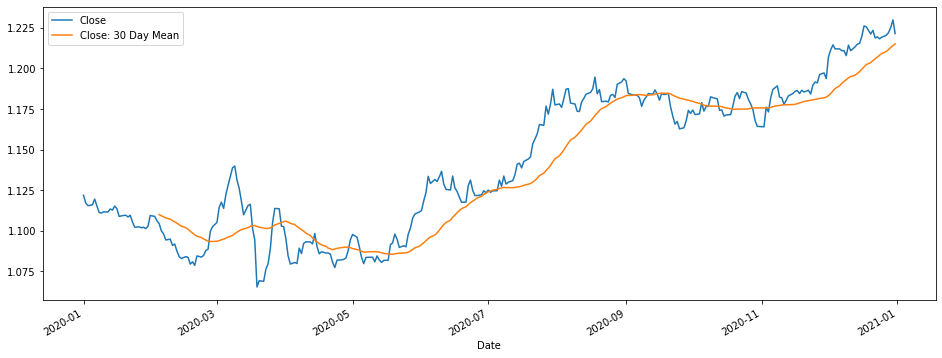

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

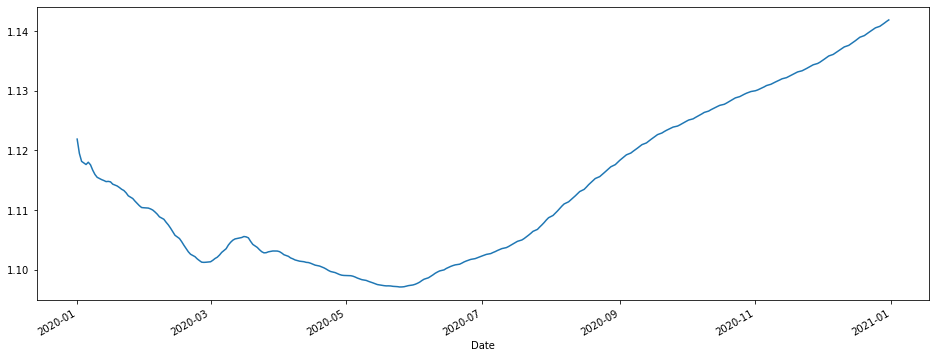

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 314):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1000, batch_size = 10)

Epoch 1/1000
26/26 [==============================] - 8s 79ms/step - loss: 0.0023
Epoch 2/1000
26/26 [==============================] - 2s 79ms/step - loss: 0.0026
Epoch 3/1000
26/26 [==============================] - 2s 78ms/step - loss: 0.0022
Epoch 4/1000
26/26 [==============================] - 2s 80ms/step - loss: 0.0019
Epoch 5/1000
26/26 [==============================] - 2s 79ms/step - loss: 0.0025
Epoch 6/1000
26/26 [==============================] - 2s 80ms/step - loss: 0.0021
Epoch 7/1000
26/26 [==============================] - 2s 80ms/step - loss: 0.0022
Epoch 8/1000
26/26 [==============================] - 2s 79ms/step - loss: 0.0019
Epoch 9/1000
26/26 [==============================] - 2s 79ms/step - loss: 0.0024
Epoch 10/1000
26/26 [==============================] - 2s 78ms/step - loss: 0.0021
Epoch 11/1000
26/26 [==============================] - 2s 79ms/step - loss: 0.0022
Epoch 12/1000
26/26 [==============================] - 2s 78ms/step - loss: 0.0022
Epoch 13/1000

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real EURUSD price of Dec 2020 - Jan 2021
dataset_test = pd.read_csv('EURUSDDaily.csv',index_col="Date",parse_dates=True)

In [ ]:
real_forex_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

,High,Low,Open,Close,Volume
Date,,,,,
2020-12-01,1.19372,1.20765,1.19353,1.20706,329953.0
2020-12-02,1.20707,1.21183,1.20399,1.21138,355708.0
2020-12-03,1.21137,1.21746,1.21010,1.21449,370344.0
2020-12-04,1.21449,1.21773,1.21101,1.21202,419215.0
2020-12-06,1.21308,1.21324,1.21195,1.21200,7103.0


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2020-12-01 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    39 non-null     float64
 1   Low     39 non-null     float64
 2   Open    39 non-null     float64
 3   Close   39 non-null     float64
 4   Volume  39 non-null     float64
dtypes: float64(5)
memory usage: 1.8 KB


In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].astype(str).str.replace(',', '').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2020-12-01 to 2021-01-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    39 non-null     float64
dtypes: float64(1)
memory usage: 624.0 bytes


In [ ]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
   X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_forex_price = regressor.predict(X_test)
predicted_forex_price = sc.inverse_transform(predicted_forex_price)

In [ ]:
predicted_forex_price=pd.DataFrame(predicted_forex_price)
predicted_forex_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40 non-null     float32
dtypes: float32(1)
memory usage: 288.0 bytes


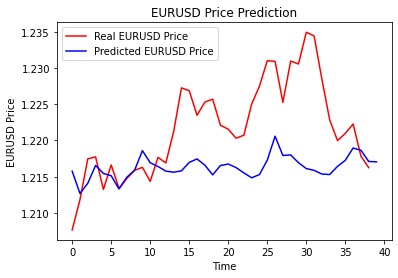

In [ ]:
# Visualising the results
plt.plot(real_forex_price, color = 'red', label = 'Real EURUSD Price')
plt.plot(predicted_forex_price, color = 'blue', label = 'Predicted EURUSD Price')
plt.title('EURUSD Price Prediction')
#plt.ylim(1.10,1.30)
plt.xlabel('Time')
plt.ylabel('EURUSD Price')
plt.legend()
plt.show()

In [ ]:
predicted_forex_price

,0
0,1.215759
1,1.212674
2,1.214086
3,1.216555
4,1.215450
5,1.215128
6,1.213304
7,1.214915
8,1.215893
9,1.218592


In [ ]:
dataset_test

,High,Low,Open,Close,Volume
Date,,,,,
2020-12-01,1.19372,1.20765,1.19353,1.20706,329953.0
2020-12-02,1.20707,1.21183,1.20399,1.21138,355708.0
2020-12-03,1.21137,1.21746,1.21010,1.21449,370344.0
2020-12-04,1.21449,1.21773,1.21101,1.21202,419215.0
2020-12-06,1.21308,1.21324,1.21195,1.21200,7103.0
2020-12-07,1.21199,1.21662,1.20784,1.21092,402011.0
2020-12-08,1.21091,1.21339,1.20953,1.21094,342812.0
2020-12-09,1.21095,1.21475,1.20587,1.20784,239324.0
2020-12-10,1.20784,1.21588,1.20784,1.21433,236023.0


In [7]:
dataset

,High,Low,Open,Close,Volume
Date,,,,,
2020-01-01,1.12120,1.12218,1.12106,1.12188,2631
2020-01-02,1.12188,1.12245,1.11635,1.11708,487247
2020-01-03,1.11707,1.11798,1.11249,1.11548,177422
2020-01-05,1.11656,1.11677,1.11589,1.11604,4401
2020-01-06,1.11603,1.12055,1.11571,1.11954,139986
...,...,...,...,...,...
2020-12-27,1.21860,1.22072,1.21811,1.22038,6150
2020-12-28,1.22039,1.22502,1.21811,1.22196,137281
2020-12-29,1.22196,1.22750,1.22193,1.22519,152122
